#### importing reqired modules

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import string

#### rading text from the file

In [37]:
with open('read.txt', 'r') as f:
  article_text = f.read()
# printing it
article_text

'I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?\n\nIt started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: “We have an unexpected baby boy; do you want him?” They said: “Of course.” My biological mother later found out that my mother had never graduated from college and that my father had never graduated from high school. She refused to sign the final adoption papers. She only relented a few months later when my parents promised that I would someday go to coll

### clearning the text, and lowercaseing

In [63]:
article_text = article_text.replace('\n', ' ')
cleaned_text = article_text.translate(str.maketrans('', '', string.punctuation)).lower()
# printing it
cleaned_text

'i dropped out of reed college after the first 6 months but then stayed around as a dropin for another 18 months or so before i really quit so why did i drop out  it started before i was born my biological mother was a young unwed college graduate student and she decided to put me up for adoption she felt very strongly that i should be adopted by college graduates so everything was all set for me to be adopted at birth by a lawyer and his wife except that when i popped out they decided at the last minute that they really wanted a girl so my parents who were on a waiting list got a call in the middle of the night asking “we have an unexpected baby boy do you want him” they said “of course” my biological mother later found out that my mother had never graduated from college and that my father had never graduated from high school she refused to sign the final adoption papers she only relented a few months later when my parents promised that i would someday go to college  and 17 years late

#### tokenize 

In [39]:
tokenize_words = cleaned_text.split(' ')
print(tokenize_words)

['i', 'dropped', 'out', 'of', 'reed', 'college', 'after', 'the', 'first', '6', 'months', 'but', 'then', 'stayed', 'around', 'as', 'a', 'dropin', 'for', 'another', '18', 'months', 'or', 'so', 'before', 'i', 'really', 'quit', 'so', 'why', 'did', 'i', 'drop', 'out', '', 'it', 'started', 'before', 'i', 'was', 'born', 'my', 'biological', 'mother', 'was', 'a', 'young', 'unwed', 'college', 'graduate', 'student', 'and', 'she', 'decided', 'to', 'put', 'me', 'up', 'for', 'adoption', 'she', 'felt', 'very', 'strongly', 'that', 'i', 'should', 'be', 'adopted', 'by', 'college', 'graduates', 'so', 'everything', 'was', 'all', 'set', 'for', 'me', 'to', 'be', 'adopted', 'at', 'birth', 'by', 'a', 'lawyer', 'and', 'his', 'wife', 'except', 'that', 'when', 'i', 'popped', 'out', 'they', 'decided', 'at', 'the', 'last', 'minute', 'that', 'they', 'really', 'wanted', 'a', 'girl', 'so', 'my', 'parents', 'who', 'were', 'on', 'a', 'waiting', 'list', 'got', 'a', 'call', 'in', 'the', 'middle', 'of', 'the', 'night', 'a

#### stop words from nltk library

In [40]:
stop_words = {'i', 'with', 'he', 'down', 'itself', 'm', 'shan', 'no', 'yourself', 'but', 'the', 'y', 'again', 'more', 'o', "she's", 'theirs', 'my', "isn't", 'are', 're', 'their', 'own', 'during', 'don', 'such', 'me', "you'll", 'have', 'has', 'an', 'isn', 'wouldn', 'between', 'just', 'this', 'himself', 'very', 'further', 'by', 'doing', 'so', "it's", "won't", 'out', 'not', 'ours', 'didn', 'on', 'were', 'that', 's', 'which', "don't", 'll', 'nor', "needn't", 'some', 'above', 'any', "shouldn't", "hadn't", "mightn't", 'needn', 'after', 'ourselves', 'a', "didn't", 'hers', 'until', "that'll", 'once', 'mustn', 'mightn', 'hadn', 'in', 'being', 'few', 'or', "doesn't", 't', 'been', "wasn't", 'can', 'themselves', 'up', 'to', 'it', 'for', 'had', 'haven', 'am', 'through', 'she', 'too', 'herself', 'than', 'as', 'yourselves', 'before', 'and', 'because', 'where', 'doesn', 'weren', 'under', 'whom', 'same', 'ain', 'was', 'should', 'there', 'hasn', 'shouldn', 'off', 'other', 'couldn', 'at', 'those', 'over', 'myself', "hasn't", 'your', 'be', 'do', 'why', 'does', 'below', "you've", 'd', 'aren', 'who', "should've", "mustn't", 'from', 'of', 've', "haven't", 'will', 'its', 'what', 'did', 'won', 'yours', 'you', 'him', 'if', 'each', 'both', 'while', 'how', 'they', 'about', 'we', "you'd", 'most', "couldn't", "weren't", "you're", 'here', 'wasn', 'all', 'them', 'now', "shan't", 'against', 'ma', "wouldn't", 'his', 'is', 'then', 'only', 'when', 'having', "aren't", 'into', 'these', 'our', 'her'}

#### getting all emotions word 

In [41]:
word_and_emotions = dict()
with open('emotions.txt', 'r') as f:
  for emotion in f.readlines():
    emotion = emotion.replace('\n', '').replace("'", '').replace(',', '').replace(' ', '')
    word, emot = emotion.split(':')
    word_and_emotions[word] = emot
  
print(word_and_emotions)

{'victimized': 'sad', 'accused': 'cheated', 'acquitted': 'singledout', 'adorable': 'loved', 'adored': 'loved', 'affected': 'attracted', 'afflicted': 'sad', 'aghast': 'fearful', 'agog': 'attracted', 'agonized': 'sad', 'alarmed': 'fearful', 'amused': 'happy', 'angry': 'angry', 'anguished': 'sad', 'animated': 'happy', 'annoyed': 'angry', 'anxious': 'attracted', 'apathetic': 'apathetic', 'appalled': 'angry', 'appeased': 'singledout', 'appreciated': 'esteemed', 'apprehensive': 'anxious', 'approvedof': 'loved', 'ardent': 'lustful', 'aroused': 'lustful', 'attached': 'attached', 'attracted': 'attracted', 'autonomous': 'free', 'awed': 'fearful', 'awkward': 'embarrassed', 'beatendown': 'powerless', 'beatific': 'happy', 'belonging': 'attached', 'bereaved': 'sad', 'betrayed': 'cheated', 'bewildered': 'surprise', 'bitter': 'angry', 'blissful': 'happy', 'blithe': 'happy', 'blocked': 'powerless', 'blue': 'sad', 'boiling': 'angry', 'bold': 'fearless', 'bored': 'bored', 'brave': 'fearless', 'bright': '

#### adding emotional_words from tokenized words to a list

In [42]:
emotioal_words = []
for word in tokenize_words:
  if word in word_and_emotions:
    emotioal_words.append(word)
    
print(emotioal_words)

['loved', 'great', 'great', 'down', 'lucky', 'loved', 'released', 'down', 'loved', 'rejected', 'replaced', 'animated', 'needed', 'loved', 'satisfied', 'great', 'great', 'great', 'important', 'important', 'down']


#### counting frequency of each word and plotting the graph

words_counts: {'loved': 4, 'great': 5, 'down': 3, 'lucky': 1, 'released': 1, 'rejected': 1, 'replaced': 1, 'animated': 1, 'needed': 1, 'satisfied': 1, 'important': 2}


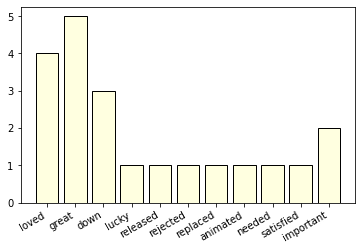

In [68]:
words_counts = Counter(emotioal_words)
print(f'words_counts: {dict(words_counts)}')
# plotting
fig, ax1 = plt.subplots()
ax1.bar(words_counts.keys(), words_counts.values(), color='lightyellow', edgecolor='black')
fig.autofmt_xdate()
plt.show()

#### checking sentinmental analysis using nltk

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [62]:
def sentiment_analyse(sentiment_text):
  score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
  if score['neg'] > score['pos']:
    print(f'Negative Sentiment')
  elif score['neg'] < score['pos']:
    print(f'Positive Sentiment')
  else:
    print(f'Neutral Sentiment')
sentiment_analyse(cleaned_text)

Positive Sentiment
